<a href="https://colab.research.google.com/github/elahers/GGE6505_A1/blob/main/OpenAQ_Time_Series_AirQuality_Prediction_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
There are several polluters you should know about. The ones I will cover in this notebook are the following:

* NO2 - Nitrogen dioxide
* CO - Carbon monoxide
* SO2 - Sulfur dioxide
* PM10 - Coarse particulate matter
* PM2.5 - Fine particulate matter

These make up most of the concerns when looking at airpollution. They are all hazardous for living being when you get them inside your body.


## Imports


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def configure_plotly_browser_state():
This code defines a function named configure_plotly_browser_state() **which is used to configure the Plotly library for display in a Jupyter notebook.**

The function first imports the IPython module, which provides functionality for interacting with the IPython kernel. It then uses the display() method to render an HTML script that loads the Plotly library via a remote CDN (content delivery network) using the requirejs library. This script configures the paths for the base and plotly modules, with the latter being loaded from the Plotly CDN.

Finally, the function calls itself, which could lead to an infinite recursion. It is likely that the function is meant to be called only once, rather than recursively.

## load and prepare data

In [8]:
 !unzip /content/sample_data/airpol.zip

Archive:  /content/sample_data/airpol.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [9]:
  !unzip /content/sample_data/indian-cities.zip

Archive:  /content/sample_data/indian-cities.zip
  inflating: Indian Cities Database.csv  


In [10]:
base_dir = './'

In [11]:
airquality = pd.read_csv(base_dir+'city_day.csv')
cities = pd.read_csv(base_dir+'Indian Cities Database.csv')

In [ ]:
airquality['Date'] = pd.to_datetime(airquality['Date'])
airquality

Looking for cities that have more data using python. it count which cities have more date and then will select the top four.


In [12]:
#Finding cities with more data
airquality_count_city = airquality.groupby("City").agg("count").sort_values("Date", ascending=False)
airquality_count_city.head(4)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2009,1381,407,1400,1401,1415,0,1400,1369,1324,1526,1526,1525,1334,1334
Bengaluru,2009,1863,1649,2003,2003,2005,1806,1998,2003,1865,1743,1916,0,1910,1910
Chennai,2009,1892,302,1973,1973,1973,1547,1984,1973,1960,1724,1756,0,1884,1884
Mumbai,2009,784,763,767,756,1510,395,1984,789,797,1799,1016,1015,775,775


to eaxmine the amount of pullotants in the air i.e. air pollution, the period between January and April has been considered.

In [13]:
airquality_filtered = airquality[airquality["Date"] > "2020-01-01"][airquality["Date"] < "2020-04-30"]
airquality_filtered

/tmp/ipython-input-2322717401.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1827,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,NaN,3.63,23.96,23.67,3.71,31.14,2.52,162.0,Moderate
1828,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,NaN,7.06,35.78,23.66,4.78,31.14,2.52,220.0,Poor
1829,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,NaN,8.97,38.98,23.65,4.12,31.14,2.52,254.0,Poor
1830,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,NaN,5.41,45.83,23.61,3.30,31.14,2.52,255.0,Poor
1831,Ahmedabad,2020-01-06,46.96,109.44,7.17,16.88,13.58,NaN,7.17,38.11,23.64,2.75,31.14,2.52,175.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29464,Visakhapatnam,2020-04-26,11.07,31.30,4.65,19.97,13.07,7.88,0.11,5.25,11.12,1.51,5.29,1.53,NaN,NaN
29465,Visakhapatnam,2020-04-27,10.47,40.29,3.40,21.59,12.95,6.50,0.11,5.58,20.53,1.96,5.06,1.22,31.0,Good
29466,Visakhapatnam,2020-04-28,12.81,46.60,0.73,15.19,7.24,7.68,0.11,6.04,30.00,2.21,4.22,0.84,47.0,Good


# Exploratory Data Analysis

## Pollution over time
These graphs below show the amounts of pollution in cities of different polluters.
One thing that stands out with all of these charts is that a significant decrease of air pollution occurs around the end of march. This correlates with the measures that were taken in India, since they entered a lockdown on March 25th 2020.

There are several spikes in the graphs, one of which is on january 26th, which can be explained by India's "Republic Day", which is a national holiday. I cannot really explain the spikes from mid february until march, but I think it has something to do with the change of season and weather, where people want to go outside.

Something else that stands out is the fact that the CO emission in Ahmedabad is much higher than in other cities. This can be caused by the rush hours, where traffic is very dense, but also the fact that the city has an international airport in the middle of it, whereas airports at the other cities lie more outside of them. It can also depend on the location of the device that measures these numbers.

This code defines a function called showscatterpolluters that takes one argument cityname. The plot contains five lines, each representing a different pollutant concentration (NO2, CO, SO2, PM10, and PM2.5) over time for the specified city.

The x-axis of the plot represents the date, and the y-axis represents the concentration of each pollutant. The data for the plot comes from a Pandas DataFrame called df.



In [14]:
df = airquality_filtered

def showscatterpolluters(cityname):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df["Date"], y=df[df["City"] == cityname]["NO2"], name="NO2"))
    fig.add_trace(go.Scatter(x=df["Date"], y=df[df["City"] == cityname]["CO"], name="CO"))
    fig.add_trace(go.Scatter(x=df["Date"], y=df[df["City"] == cityname]["SO2"], name="SO2"))
    fig.add_trace(go.Scatter(x=df["Date"], y=df[df["City"] == cityname]["PM10"], name="PM10"))
    fig.add_trace(go.Scatter(x=df["Date"], y=df[df["City"] == cityname]["PM2.5"], name="PM2.5"))

    fig.update_xaxes(rangeslider_visible=True)

    fig.update_layout(title="Polluters in " + cityname)

    fig.show(renderer="colab")

showscatterpolluters("Ahmedabad")
showscatterpolluters("Bengaluru")
showscatterpolluters("Mumbai")
showscatterpolluters("Lucknow")

This code calculates the average decrease in nitrogen dioxide (NO2) concentration in the air before and after a specific date. It then creates a pie chart using the plotly.graph_objs module to visualize the calculated values.

## Overall Before and After Analysis

### NO2

In [15]:
df = airquality_filtered

beforemean = df[df["Date"] <= "2020-03-23"]["NO2"].mean()
aftermean = df[df["Date"] > "2020-03-23"]["NO2"].mean()

labels = ["Before", "After"]
values = [beforemean, aftermean]

fig = go.Figure(data=[go.Bar(x=labels, y=values, marker=dict(color=['#FFA07A', '#90EE90']))])

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(title_text="That's an average decrease of almost 45% in NO2 levels!", xaxis_title="Time period", yaxis_title="NO2 average")

fig.show(renderer="colab")

### SO2

In [16]:
df = airquality_filtered

beforemean = df[df["Date"] <= "2020-03-23"]["SO2"].mean()
aftermean = df[df["Date"] > "2020-03-23"]["SO2"].mean()

labels = ["Before", "After"]
values = [beforemean, aftermean]

fig = go.Figure(data=[go.Bar(x=labels, y=values, marker=dict(color=['#FFA07A', '#90EE90']))])

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(title_text="That's an average decrease of almost 18% in SO2 levels!", xaxis_title="Time period", yaxis_title="SO2 average")

fig.show(renderer="colab")

## Before and after measures

Here you can see very clearly the hotspots of these emissions, before and after corona measures. You can see that emissions are reduced by more than 50%!

In [17]:
import plotly.express as px
from plotly.subplots import make_subplots
airquality_filteredwlonlat = airquality_filtered.set_index('City').join(cities.set_index('City'))


fig = make_subplots(rows=1, cols=2)

aqfll_before = airquality_filteredwlonlat[airquality_filteredwlonlat["Date"] < "2020-03-07"]
aqfll_after = airquality_filteredwlonlat[airquality_filteredwlonlat["Date"] > "2020-04-01"]

fig = px.density_mapbox(aqfll_before, lat='Lat', lon='Long', z='SO2', radius=30,
                        center=dict(lat=20, lon=80), zoom=3,
                        range_color=[0,150],
                        mapbox_style="stamen-watercolor")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=500,
)
fig.update_traces(opacity=0.5)
fig.show(renderer="colab")

fig = px.density_mapbox(aqfll_after, lat='Lat', lon='Long', z='SO2', radius=30,
                        center=dict(lat=20, lon=80), zoom=3,
                        range_color=[0,150],
                        mapbox_style="stamen-watercolor") #if not good use mapbox_style="carto-positron"
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=500
)

fig.update_traces(opacity=0.5)
fig.show(renderer="colab")

## Bar Chart of Overall Before and After Analysis

In [18]:
so2_before_mean = aqfll_before["SO2"].mean()
so2_after_mean = aqfll_after["SO2"].mean()
pm25_before_mean = aqfll_before["PM2.5"].mean()
pm25_after_mean = aqfll_after["PM2.5"].mean()
pm10_before_mean = aqfll_before["PM10"].mean()
pm10_after_mean = aqfll_after["PM10"].mean()
co_before_mean = aqfll_before["CO"].mean()
co_after_mean = aqfll_after["CO"].mean()
no2_before_mean = aqfll_before["NO2"].mean()
no2_after_mean = aqfll_after["NO2"].mean()

fig = make_subplots(rows=2, cols=3, subplot_titles=("SO2 (ug/m3)","PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO (ug/m3)", "NO2 (ug/m3)"))
fig.add_trace(go.Bar(y=[so2_before_mean], name="Before"), row=1, col=1)
fig.add_trace(go.Bar(y=[so2_after_mean], name="After"), row=1, col=1)
fig.add_trace(go.Bar(y=[pm25_before_mean], name="Before"), row=1, col=2)
fig.add_trace(go.Bar(y=[pm25_after_mean], name="After"), row=1, col=2)
fig.add_trace(go.Bar(y=[pm10_before_mean], name="Before"), row=1, col=3)
fig.add_trace(go.Bar(y=[pm10_after_mean], name="After"), row=1, col=3)

fig.add_trace(go.Bar(y=[co_before_mean], name="Before"), row=2, col=1)
fig.add_trace(go.Bar(y=[co_after_mean], name="After"), row=2, col=1)
fig.add_trace(go.Bar(y=[no2_before_mean], name="Before"), row=2, col=2)
fig.add_trace(go.Bar(y=[no2_after_mean], name="After"), row=2, col=2)

fig.update_layout(showlegend=False, title_text="A detailed look into reduction of several types of polluters")

fig.show(renderer="colab")

# Modeling time series

Here, we will use LSTM to predict **tomorrow** from the last **20 days**.

### Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

### Prepare the dataset

In [20]:
delhi = airquality[airquality['City']=='Delhi']
training_set = delhi[['PM2.5']]
training_set = training_set.fillna(training_set.mean())

#### Plotting training set

<Axes: >

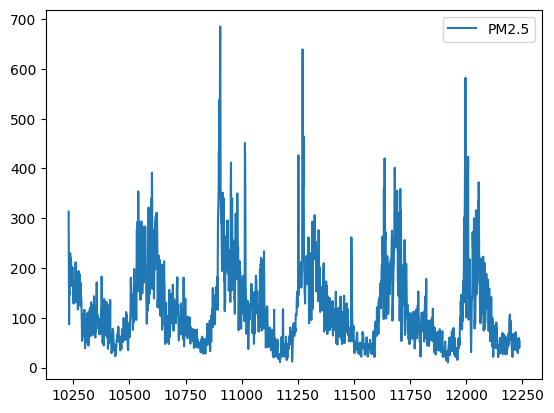

In [21]:
training_set.plot()

#### checking for `nan` values

In [22]:
np.sum(training_set.isna())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



,0
PM2.5,0


#### setting up the train and test sets

In [23]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

# Setting up the scaler
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

# preparing the sliding windows
seq_length = 4
x, y = sliding_windows(training_data, seq_length)

# train and test split
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

# convert to pytorch Tensor
trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

### Define the LSTM Model

In [24]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

### Training stage



In [26]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, trainY)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.09295
Epoch: 100, loss: 0.00906
Epoch: 200, loss: 0.00396
Epoch: 300, loss: 0.00359
Epoch: 400, loss: 0.00338
Epoch: 500, loss: 0.00327
Epoch: 600, loss: 0.00321
Epoch: 700, loss: 0.00318
Epoch: 800, loss: 0.00317
Epoch: 900, loss: 0.00316
Epoch: 1000, loss: 0.00316
Epoch: 1100, loss: 0.00315
Epoch: 1200, loss: 0.00315
Epoch: 1300, loss: 0.00315
Epoch: 1400, loss: 0.00314
Epoch: 1500, loss: 0.00314
Epoch: 1600, loss: 0.00314
Epoch: 1700, loss: 0.00313
Epoch: 1800, loss: 0.00313
Epoch: 1900, loss: 0.00313


### Evaluation stage

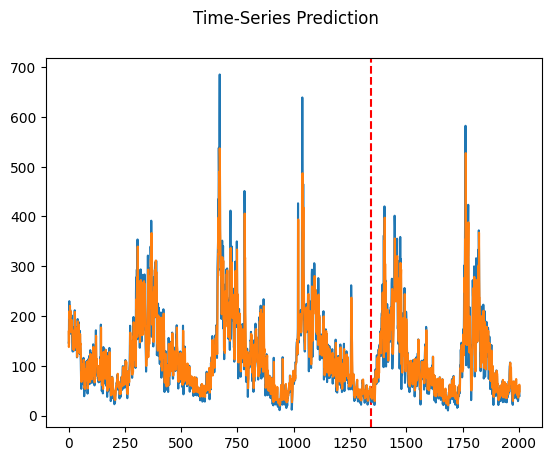

In [27]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()